#### <span style="font-family: 'Montserrat', sans-serif;"> This Python notebook covers Data Inspection, Cleaning, EDA and Feature Engineering

<span style="font-family: 'Montserrat', sans-serif;">Library Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
file_path = "AA project data 2023.xlsx"

<span style="font-family: 'Montserrat', sans-serif;"> Import Data

In [4]:
sheets = pd.read_excel(file_path, sheet_name = None)

In [5]:
print(sheets)

{'Data1':             PNR PNR_CREATE_DT  NUM_IN_PARTY   CHANNEL ORIGIN DEST       OD  \
0            A1    2022-10-09             1    DIRECT    LEX  CLT  LEX-CLT   
1            A2    2022-10-17             1  BUSINESS    ORD  DFW  ORD-DFW   
2            A3    2022-10-30             1    DIRECT    ORD  MSP  ORD-MSP   
3            A4    2022-08-25             1  BUSINESS    CMH  PHL  CMH-PHL   
4            A5    2022-08-27             2       OTA    GSO  ATL  GSO-ATL   
...         ...           ...           ...       ...    ...  ...      ...   
702063  A702064    2022-10-19             1  BUSINESS    DFW  ORD  DFW-ORD   
702064  A702065    2022-03-31             2    DIRECT    PHL  BOS  PHL-BOS   
702065  A702066    2022-12-04             1    DIRECT    DCA  RDU  DCA-RDU   
702066  A702067    2022-07-06             1    DIRECT    IND  ORD  IND-ORD   
702067  A702068    2022-09-14             1       TMC    PHL  CMH  PHL-CMH   

        NUM_SEGMENTS PNR_DEPARTURE_DATE      PNR_RETU

In [6]:
# Modify Column name for data5 from "DESTINATION" to "DEST"
new_column_name = {'DESTINATION': 'DEST'}

for sheet_name, df in sheets.items():
    sheets[sheet_name] = df.rename(columns=new_column_name)
    
print(sheets)

{'Data1':             PNR PNR_CREATE_DT  NUM_IN_PARTY   CHANNEL ORIGIN DEST       OD  \
0            A1    2022-10-09             1    DIRECT    LEX  CLT  LEX-CLT   
1            A2    2022-10-17             1  BUSINESS    ORD  DFW  ORD-DFW   
2            A3    2022-10-30             1    DIRECT    ORD  MSP  ORD-MSP   
3            A4    2022-08-25             1  BUSINESS    CMH  PHL  CMH-PHL   
4            A5    2022-08-27             2       OTA    GSO  ATL  GSO-ATL   
...         ...           ...           ...       ...    ...  ...      ...   
702063  A702064    2022-10-19             1  BUSINESS    DFW  ORD  DFW-ORD   
702064  A702065    2022-03-31             2    DIRECT    PHL  BOS  PHL-BOS   
702065  A702066    2022-12-04             1    DIRECT    DCA  RDU  DCA-RDU   
702066  A702067    2022-07-06             1    DIRECT    IND  ORD  IND-ORD   
702067  A702068    2022-09-14             1       TMC    PHL  CMH  PHL-CMH   

        NUM_SEGMENTS PNR_DEPARTURE_DATE      PNR_RETU

<span style="font-family: 'Montserrat', sans-serif;">Combine all dictionary values into one dataframe by using a list

In [7]:
# create empty dictionary
df_all = []

#append dictionary values into df_all
for sheet_name, df in sheets.items():
    df_all.append(df)

In [8]:
print(df_all[0])

            PNR PNR_CREATE_DT  NUM_IN_PARTY   CHANNEL ORIGIN DEST       OD  \
0            A1    2022-10-09             1    DIRECT    LEX  CLT  LEX-CLT   
1            A2    2022-10-17             1  BUSINESS    ORD  DFW  ORD-DFW   
2            A3    2022-10-30             1    DIRECT    ORD  MSP  ORD-MSP   
3            A4    2022-08-25             1  BUSINESS    CMH  PHL  CMH-PHL   
4            A5    2022-08-27             2       OTA    GSO  ATL  GSO-ATL   
...         ...           ...           ...       ...    ...  ...      ...   
702063  A702064    2022-10-19             1  BUSINESS    DFW  ORD  DFW-ORD   
702064  A702065    2022-03-31             2    DIRECT    PHL  BOS  PHL-BOS   
702065  A702066    2022-12-04             1    DIRECT    DCA  RDU  DCA-RDU   
702066  A702067    2022-07-06             1    DIRECT    IND  ORD  IND-ORD   
702067  A702068    2022-09-14             1       TMC    PHL  CMH  PHL-CMH   

        NUM_SEGMENTS PNR_DEPARTURE_DATE      PNR_RETURN_DATE  \

<span style="font-family: 'Montserrat', sans-serif;">Combine all sheets into one single dataframe

In [9]:
%%time
#combine and reset index
airline_df = pd.concat(df_all, ignore_index = True)

CPU times: user 70.3 ms, sys: 74.9 ms, total: 145 ms
Wall time: 179 ms


In [10]:
airline_df['PNR_RETURN_DATE'] = pd.to_datetime(airline_df['PNR_RETURN_DATE'], errors='coerce')

In [11]:
airline_df.PNR_RETURN_DATE.dtype

dtype('<M8[ns]')

In [12]:
airline_df.head()

,PNR,PNR_CREATE_DT,NUM_IN_PARTY,CHANNEL,ORIGIN,DEST,OD,NUM_SEGMENTS,PNR_DEPARTURE_DATE,PNR_RETURN_DATE,BUSINESS_PROBABILITY,BLEISURE_PROBABILITY,VFR_PROBABILITY,VACATION_PROBABILITY,PERSONAL_PROBABILITY,REVENUE
0,A1,2022-10-09,1,DIRECT,LEX,CLT,LEX-CLT,1,2022-10-20,NaT,0.1477,0.1071,0.6099,0.0264,0.1088,315.35
1,A2,2022-10-17,1,BUSINESS,ORD,DFW,ORD-DFW,1,2022-11-14,NaT,0.9336,0.0559,0.0026,0.0014,0.0064,285.58
2,A3,2022-10-30,1,DIRECT,ORD,MSP,ORD-MSP,1,2022-11-02,NaT,0.9689,0.022,0.0049,0.0022,0.002,463.26
3,A4,2022-08-25,1,BUSINESS,CMH,PHL,CMH-PHL,1,2022-09-27,NaT,0.9673,0.0265,0.0017,0.0015,0.003,186.05
4,A5,2022-08-27,2,OTA,GSO,ATL,GSO-ATL,1,2022-10-30,NaT,0.0607,0.0323,0.6374,0.1432,0.1263,124.65


In [13]:
airline_df.tail(10)

,PNR,PNR_CREATE_DT,NUM_IN_PARTY,CHANNEL,ORIGIN,DEST,OD,NUM_SEGMENTS,PNR_DEPARTURE_DATE,PNR_RETURN_DATE,BUSINESS_PROBABILITY,BLEISURE_PROBABILITY,VFR_PROBABILITY,VACATION_PROBABILITY,PERSONAL_PROBABILITY,REVENUE
3605243,E445820,2022-09-23,2,BUSINESS,VPS,AUS,VPS-AUS,1,2022-10-13,NaT,0.333,0.2162,0.2298,0.1695,0.0515,424.19
3605244,E445821,2022-11-30,2,DIRECT,BUF,VPS,BUF-VPS,2,2022-12-14,2022-12-19,0.0254,0.0445,0.7418,0.1418,0.0466,110.70
3605245,E445822,2022-05-11,2,DIRECT,DFW,TVC,DFW-TVC,1,2022-08-02,NaT,0.0314,0.0575,0.3546,0.4678,0.0887,155.92
3605246,E445823,2022-06-29,1,TMC,DFW,ECP,DFW-ECP,2,2022-07-05,2022-07-08,0.8587,0.1091,0.0112,0.0105,0.0106,135.81
3605247,E445824,2022-11-12,1,TMC,CID,VPS,CID-VPS,1,2022-11-14,NaT,0.9104,0.0741,0.0063,0.0057,0.0035,165.66
3605248,E445825,2022-11-12,1,TMC,DFW,VPS,DFW-VPS,1,2022-11-14,NaT,0.9104,0.0741,0.0063,0.0057,0.0035,328.83
3605249,E445826,2022-10-13,2,TMC,BFL,CHS,BFL-CHS,1,2022-10-22,NaT,0.4365,0.4998,0.0267,0.0271,0.0099,258.65
3605250,E445827,2022-08-22,2,DIRECT,MYR,AUS,MYR-AUS,1,2022-10-26,NaT,0.9557,0.0323,0.0059,0.0028,0.0034,129.30
3605251,E445828,2022-07-06,1,DIRECT,DCA,MVY,DCA-MVY,1,2022-07-09,NaT,0.0224,0.0206,0.5608,0.2988,0.0974,189.77
3605252,E445829,2022-09-27,2,BUSINESS,RIC,EYW,RIC-EYW,1,2022-10-12,NaT,0.9266,0.0612,0.0045,0.0044,0.0033,209.53


## <span style="font-family: 'Montserrat', sans-serif;"> Data Inspection

In [14]:
airline_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3605253 entries, 0 to 3605252
Data columns (total 16 columns):
 #   Column                Dtype         
---  ------                -----         
 0   PNR                   object        
 1   PNR_CREATE_DT         datetime64[ns]
 2   NUM_IN_PARTY          int64         
 3   CHANNEL               object        
 4   ORIGIN                object        
 5   DEST                  object        
 6   OD                    object        
 7   NUM_SEGMENTS          int64         
 8   PNR_DEPARTURE_DATE    datetime64[ns]
 9   PNR_RETURN_DATE       datetime64[ns]
 10  BUSINESS_PROBABILITY  object        
 11  BLEISURE_PROBABILITY  object        
 12  VFR_PROBABILITY       object        
 13  VACATION_PROBABILITY  object        
 14  PERSONAL_PROBABILITY  object        
 15  REVENUE               float64       
dtypes: datetime64[ns](3), float64(1), int64(2), object(10)
memory usage: 440.1+ MB


<span style="font-family: 'Montserrat', sans-serif;"> Unique values in each column

In [15]:
airline_df.nunique()

PNR                     3605253
PNR_CREATE_DT               702
NUM_IN_PARTY                 66
CHANNEL                       6
ORIGIN                      205
DEST                        205
OD                         4122
NUM_SEGMENTS                  4
PNR_DEPARTURE_DATE          184
PNR_RETURN_DATE             258
BUSINESS_PROBABILITY       9869
BLEISURE_PROBABILITY       7412
VFR_PROBABILITY            9769
VACATION_PROBABILITY       9911
PERSONAL_PROBABILITY       7491
REVENUE                   91216
dtype: int64

In [16]:
airline_df.describe() 

,PNR_CREATE_DT,NUM_IN_PARTY,NUM_SEGMENTS,PNR_DEPARTURE_DATE,PNR_RETURN_DATE,REVENUE
count,3605253,3.605253e+06,3.605253e+06,3605253,302592,3.605253e+06
mean,2022-08-24 21:59:11.752403456,1.844688e+00,1.083978e+00,2022-09-29 20:24:11.406157056,2022-10-02 08:25:42.163706368,3.300881e+02
min,2019-10-16 00:00:00,1.000000e+00,1.000000e+00,2022-07-01 00:00:00,2022-07-01 00:00:00,0.000000e+00
25%,2022-07-13 00:00:00,1.000000e+00,1.000000e+00,2022-08-15 00:00:00,2022-08-22 00:00:00,1.786000e+02
50%,2022-08-30 00:00:00,2.000000e+00,1.000000e+00,2022-10-01 00:00:00,2022-10-01 00:00:00,2.518300e+02
75%,2022-10-15 00:00:00,2.000000e+00,1.000000e+00,2022-11-13 00:00:00,2022-11-11 00:00:00,3.804700e+02
max,2023-01-03 00:00:00,9.000000e+01,4.000000e+00,2022-12-31 00:00:00,2023-05-12 00:00:00,2.209150e+04
std,NaN,1.310419e+00,2.774513e-01,NaN,NaN,2.976241e+02


In [17]:
airline_df['CHANNEL'].value_counts()

CHANNEL
DIRECT      2013791
OTA          603411
TMC          503651
BUSINESS     298111
LEISURE      155009
?             31280
Name: count, dtype: int64

## <span style="font-family: 'Montserrat', sans-serif;"> Data Cleaning

<span style="font-family: 'Montserrat', sans-serif;">Checking the number of Nulls in the data

In [18]:
airline_df.isnull().sum() 

PNR                           0
PNR_CREATE_DT                 0
NUM_IN_PARTY                  0
CHANNEL                       0
ORIGIN                        0
DEST                          0
OD                            0
NUM_SEGMENTS                  0
PNR_DEPARTURE_DATE            0
PNR_RETURN_DATE         3302661
BUSINESS_PROBABILITY          0
BLEISURE_PROBABILITY          0
VFR_PROBABILITY               0
VACATION_PROBABILITY          0
PERSONAL_PROBABILITY          0
REVENUE                       0
dtype: int64

<span style="font-family: 'Montserrat', sans-serif;">On inspecting the data manually, we found that missing values in `CHANNEL` are filled by `?` in data. 

In [19]:
#Missing values counts
(airline_df == '?').sum()

PNR                         0
PNR_CREATE_DT               0
NUM_IN_PARTY                0
CHANNEL                 31280
ORIGIN                      0
DEST                        0
OD                          0
NUM_SEGMENTS                0
PNR_DEPARTURE_DATE          0
PNR_RETURN_DATE             0
BUSINESS_PROBABILITY    19715
BLEISURE_PROBABILITY    19715
VFR_PROBABILITY         19715
VACATION_PROBABILITY    19715
PERSONAL_PROBABILITY    19715
REVENUE                     0
dtype: int64

In [20]:
#(row count, column count)
airline_df.shape  

(3605253, 16)

 <span style="font-family: 'Montserrat', sans-serif;">1. Replacing `?` with `UNKNOWN` in the `CHANNEL` column

In [21]:
aa_df = airline_df
aa_df['CHANNEL'].replace('?', 'UNKNOWN', inplace = True)

In [22]:
aa_df['CHANNEL'].value_counts()

CHANNEL
DIRECT      2013791
OTA          603411
TMC          503651
BUSINESS     298111
LEISURE      155009
UNKNOWN       31280
Name: count, dtype: int64

<span style="font-family: 'Montserrat', sans-serif;">2. Cleaning the probability columns

In [23]:
# Replace '?' with NaN in probability columns
probability_columns = ['BUSINESS_PROBABILITY', 'BLEISURE_PROBABILITY', 'VFR_PROBABILITY', 'VACATION_PROBABILITY', 'PERSONAL_PROBABILITY']

for col in probability_columns:
    aa_df[col].replace('?', np.nan, inplace=True)

(aa_df == '?').sum()

PNR                     0
PNR_CREATE_DT           0
NUM_IN_PARTY            0
CHANNEL                 0
ORIGIN                  0
DEST                    0
OD                      0
NUM_SEGMENTS            0
PNR_DEPARTURE_DATE      0
PNR_RETURN_DATE         0
BUSINESS_PROBABILITY    0
BLEISURE_PROBABILITY    0
VFR_PROBABILITY         0
VACATION_PROBABILITY    0
PERSONAL_PROBABILITY    0
REVENUE                 0
dtype: int64

In [24]:
#check if the '?' are replaced with NaN 
aa_df[probability_columns].isnull().sum()

BUSINESS_PROBABILITY    19715
BLEISURE_PROBABILITY    19715
VFR_PROBABILITY         19715
VACATION_PROBABILITY    19715
PERSONAL_PROBABILITY    19715
dtype: int64

<span style="font-family: 'Montserrat', sans-serif;">Rows having missing values in probability columns are less than 1% of the dataset . Hence, dropping rows with missing probability values



In [25]:
# Convert columns to numeric, forcing errors to NaN (in case any other non-numeric values exist)
for col in probability_columns:
    aa_df[col] = pd.to_numeric(aa_df[col], errors='coerce')

# Drop rows with NaN values in any of the probability columns
aa_df = aa_df.dropna(subset=probability_columns)

# new row counts
print(aa_df.shape)

(3585538, 16)


<span style="font-family: 'Montserrat', sans-serif;">3. Creating `Advanced_PURCHASE` column to remove more anomalies

In [26]:
#  PNR_DEPARTURE_DATE - PNR_CREATE_DT
aa_df['ADVANCED_PURCHASE'] = (aa_df['PNR_DEPARTURE_DATE'] - aa_df['PNR_CREATE_DT']).dt.days

aa_df[['PNR_CREATE_DT', 'PNR_DEPARTURE_DATE', 'ADVANCED_PURCHASE']].head()

,PNR_CREATE_DT,PNR_DEPARTURE_DATE,ADVANCED_PURCHASE
0,2022-10-09,2022-10-20,11
1,2022-10-17,2022-11-14,28
2,2022-10-30,2022-11-02,3
3,2022-08-25,2022-09-27,33
4,2022-08-27,2022-10-30,64


<span style="font-family: 'Montserrat', sans-serif;"> American Airlines communicated in the initial presentation that an airline ticket goes for sale no more than 331 days before the day of departure. Also, one cannot purchase a ticket after the day of departure. Hence we will be using these thresholds to check for anomalies in the data.

In [27]:
#Minimum AP
min(aa_df['ADVANCED_PURCHASE'])

-15

In [28]:
#Rows having less than the set threshold for minimum AP
sum((aa_df['ADVANCED_PURCHASE'] < 0))

74

In [29]:
#Maximum AP
max(aa_df['ADVANCED_PURCHASE'])

955

In [30]:
#Rows having more than the set threshold for maximum AP
sum((aa_df['ADVANCED_PURCHASE'] > 331))

1019

In [31]:
#Filtering out
aa_df_cleaned = aa_df[(aa_df['ADVANCED_PURCHASE'] >= 0) & (aa_df['ADVANCED_PURCHASE'] < 331)]
 
print('dropped counts:', aa_df.shape[0] - aa_df_cleaned.shape[0])

# Display the first few rows of the cleaned DataFrame
print(aa_df_cleaned[['PNR_CREATE_DT', 'PNR_DEPARTURE_DATE', 'ADVANCED_PURCHASE']].head())


dropped counts: 1320
  PNR_CREATE_DT PNR_DEPARTURE_DATE  ADVANCED_PURCHASE
0    2022-10-09         2022-10-20                 11
1    2022-10-17         2022-11-14                 28
2    2022-10-30         2022-11-02                  3
3    2022-08-25         2022-09-27                 33
4    2022-08-27         2022-10-30                 64


<span style="font-family: 'Montserrat', sans-serif;">4. Add `ROUNDTRIP` column

In [32]:
aa_df_cleaned['ROUNDTRIP'] = np.where(aa_df_cleaned['PNR_RETURN_DATE'].isna(), 0, 1)
aa_df_cleaned['ROUNDTRIP'] = aa_df_cleaned['ROUNDTRIP'].astype(bool)

<span style="font-family: 'Montserrat', sans-serif;">5. Add `NONSTOP` column

In [33]:
aa_df_cleaned['NONSTOP'] = np.where(aa_df_cleaned['NUM_SEGMENTS'] == 1, 1, 0)
aa_df_cleaned['NONSTOP'] = aa_df_cleaned['NONSTOP'].astype(bool)

<span style="font-family: 'Montserrat', sans-serif;">6. Add `REVENUE_PER_PERSON` column

In [34]:
aa_df_cleaned['REVENUE_PER_PERSON'] = aa_df_cleaned['REVENUE'] / aa_df_cleaned['NUM_IN_PARTY']
aa_df_cleaned[['REVENUE_PER_PERSON','REVENUE','NUM_IN_PARTY']].head(7)

,REVENUE_PER_PERSON,REVENUE,NUM_IN_PARTY
0,315.350,315.35,1
1,285.580,285.58,1
2,463.260,463.26,1
3,186.050,186.05,1
4,62.325,124.65,2
5,106.980,106.98,1
6,102.330,102.33,1


<span style="font-family: 'Montserrat', sans-serif;">7. Add `TRAVEL_TYPE` column

In [35]:
# Segment the travelers based on highest probability
aa_df_cleaned['TRAVEL_TYPE'] = aa_df_cleaned[['BUSINESS_PROBABILITY', 
                                              'BLEISURE_PROBABILITY', 
                                              'VFR_PROBABILITY', 
                                              'VACATION_PROBABILITY', 
                                              'PERSONAL_PROBABILITY']].idxmax(axis=1)

mapping = {
    'BUSINESS_PROBABILITY': 'BUSINESS',
    'BLEISURE_PROBABILITY': 'BLEISURE',
    'VFR_PROBABILITY': 'VFR',
    'VACATION_PROBABILITY': 'VACATION',
    'PERSONAL_PROBABILITY': 'PERSONAL'
}

aa_df_cleaned['TRAVEL_TYPE'] = aa_df_cleaned['TRAVEL_TYPE'].replace(mapping)
aa_df_cleaned.head()

,PNR,PNR_CREATE_DT,NUM_IN_PARTY,CHANNEL,ORIGIN,DEST,OD,NUM_SEGMENTS,PNR_DEPARTURE_DATE,PNR_RETURN_DATE,...,BLEISURE_PROBABILITY,VFR_PROBABILITY,VACATION_PROBABILITY,PERSONAL_PROBABILITY,REVENUE,ADVANCED_PURCHASE,ROUNDTRIP,NONSTOP,REVENUE_PER_PERSON,TRAVEL_TYPE
0,A1,2022-10-09,1,DIRECT,LEX,CLT,LEX-CLT,1,2022-10-20,NaT,...,0.1071,0.6099,0.0264,0.1088,315.35,11,False,True,315.350,VFR
1,A2,2022-10-17,1,BUSINESS,ORD,DFW,ORD-DFW,1,2022-11-14,NaT,...,0.0559,0.0026,0.0014,0.0064,285.58,28,False,True,285.580,BUSINESS
2,A3,2022-10-30,1,DIRECT,ORD,MSP,ORD-MSP,1,2022-11-02,NaT,...,0.0220,0.0049,0.0022,0.0020,463.26,3,False,True,463.260,BUSINESS
3,A4,2022-08-25,1,BUSINESS,CMH,PHL,CMH-PHL,1,2022-09-27,NaT,...,0.0265,0.0017,0.0015,0.0030,186.05,33,False,True,186.050,BUSINESS
4,A5,2022-08-27,2,OTA,GSO,ATL,GSO-ATL,1,2022-10-30,NaT,...,0.0323,0.6374,0.1432,0.1263,124.65,64,False,True,62.325,VFR


## <span style="font-family: 'Montserrat', sans-serif;">Selecting the right data for analyses

<span style="font-family: 'Montserrat', sans-serif;">Our team focuses on the American Airlines customers that are identified as leisure travellers. Hence, we filter the dataset and remvoe rows that have business or bleisure probability as the highest amongst all the probabilities


In [36]:
# Our team studies vacation and leisure travelers (non-business)
leisure_df = aa_df_cleaned[aa_df_cleaned['TRAVEL_TYPE'].isin(['VFR', 'VACATION', 'PERSONAL'])]
leisure_df.head(7)

,PNR,PNR_CREATE_DT,NUM_IN_PARTY,CHANNEL,ORIGIN,DEST,OD,NUM_SEGMENTS,PNR_DEPARTURE_DATE,PNR_RETURN_DATE,...,BLEISURE_PROBABILITY,VFR_PROBABILITY,VACATION_PROBABILITY,PERSONAL_PROBABILITY,REVENUE,ADVANCED_PURCHASE,ROUNDTRIP,NONSTOP,REVENUE_PER_PERSON,TRAVEL_TYPE
0,A1,2022-10-09,1,DIRECT,LEX,CLT,LEX-CLT,1,2022-10-20,NaT,...,0.1071,0.6099,0.0264,0.1088,315.35,11,False,True,315.350,VFR
4,A5,2022-08-27,2,OTA,GSO,ATL,GSO-ATL,1,2022-10-30,NaT,...,0.0323,0.6374,0.1432,0.1263,124.65,64,False,True,62.325,VFR
5,A6,2022-10-04,1,OTA,PHL,BOS,PHL-BOS,1,2022-10-05,NaT,...,0.0279,0.6820,0.1018,0.1179,106.98,1,False,True,106.980,VFR
6,A7,2022-07-13,1,DIRECT,PHL,BOS,PHL-BOS,1,2022-09-04,NaT,...,0.1876,0.5239,0.1573,0.0560,102.33,53,False,True,102.330,VFR
10,A11,2022-11-20,1,OTA,ELP,PHX,ELP-PHX,1,2022-11-20,NaT,...,0.0494,0.4719,0.2005,0.1940,71.75,0,False,True,71.750,VFR
12,A13,2022-11-07,1,DIRECT,ORD,DFW,ORD-DFW,1,2022-11-14,NaT,...,0.0657,0.6133,0.1094,0.1556,552.56,7,False,True,552.560,VFR
16,A17,2022-05-26,2,DIRECT,LAX,HSV,LAX-HSV,1,2022-11-25,NaT,...,0.1296,0.4564,0.3082,0.0652,283.72,183,False,True,141.860,VFR


## <span style="font-family: 'Montserrat', sans-serif;"> Exploratory Data Analysis and Visualizations

<span style="font-family: 'Montserrat', sans-serif;">1. Custom Palette for original 5 colors of American Airlines

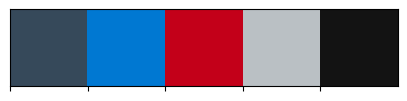

In [37]:
custom_palette = ['#36495A',  # DARK GRAY
                  '#0078D2',  # BLUE
                  '#C30019',  # RED
                  '#bac0c4',  # LIGHT STEEL BLUE
                  '#131313']  # BLACK
sns.palplot(custom_palette)

<span style="font-family: 'Montserrat', sans-serif;">2. cmap for gradient

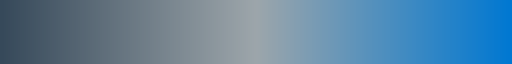

In [38]:
primary_colors = ['#36495A', '#9DA6AB' ,'#0078D2'] 
cmap = mcolors.LinearSegmentedColormap.from_list('AA_Gradient', primary_colors, N=256)
cmap

<span style="font-family: 'Montserrat', sans-serif;"> 3. Extended Palette for more colors (10 colors)

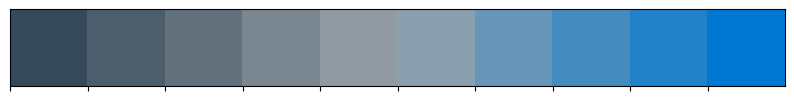

In [39]:
num_colors = 10
extended_palette = [cmap(i / (num_colors - 1)) for i in range(num_colors)] 
sns.palplot(extended_palette)

#### <span style="font-family: 'Montserrat', sans-serif;">Correlation Matrix

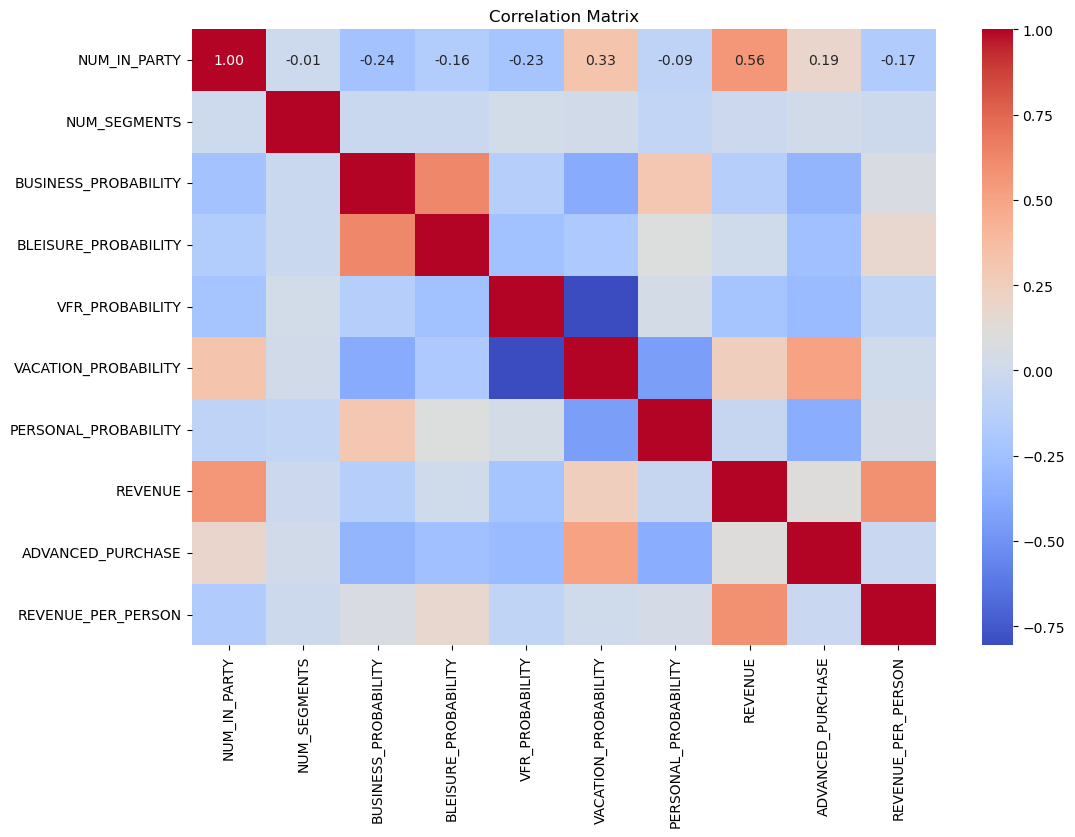

In [40]:
# Select only numeric columns from the dataframe
numeric_df = leisure_df.select_dtypes(include=[float, int])
numeric_df = numeric_df.fillna(0)

# Generate the correlation matrix
corr_matrix = numeric_df.corr()

# Plotting
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

#### <span style="font-family: 'Montserrat', sans-serif;"> Average Revenue by Channel

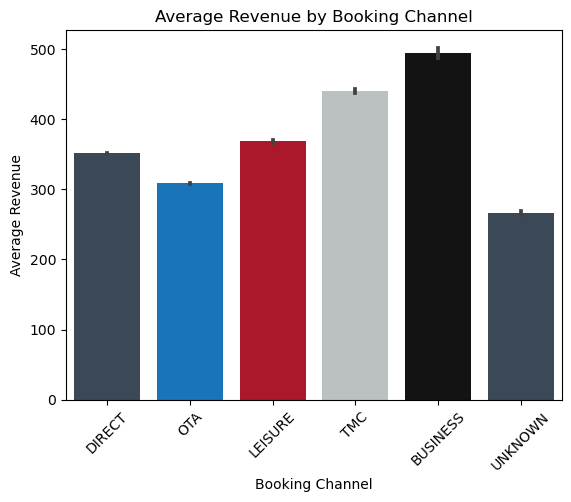

In [41]:
sns.barplot(x='CHANNEL', y='REVENUE', data=leisure_df, estimator=np.mean, palette=custom_palette)
plt.title('Average Revenue by Booking Channel')
plt.xlabel('Booking Channel')
plt.ylabel('Average Revenue')
plt.xticks(rotation=45)
plt.show()

#### <span style="font-family: 'Montserrat', sans-serif;"> Travel Type Distribution

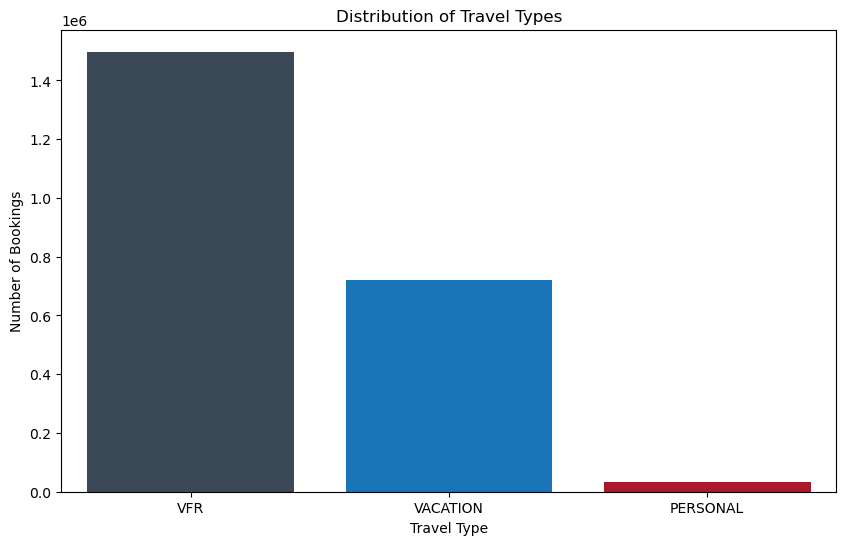

In [42]:
plt.figure(figsize=(10, 6))
sns.countplot(x='TRAVEL_TYPE', data=leisure_df, palette=custom_palette)
plt.title('Distribution of Travel Types')
plt.xlabel('Travel Type')
plt.ylabel('Number of Bookings')
plt.show()

#### <span style="font-family: 'Montserrat', sans-serif;"> Layovers for each travel type

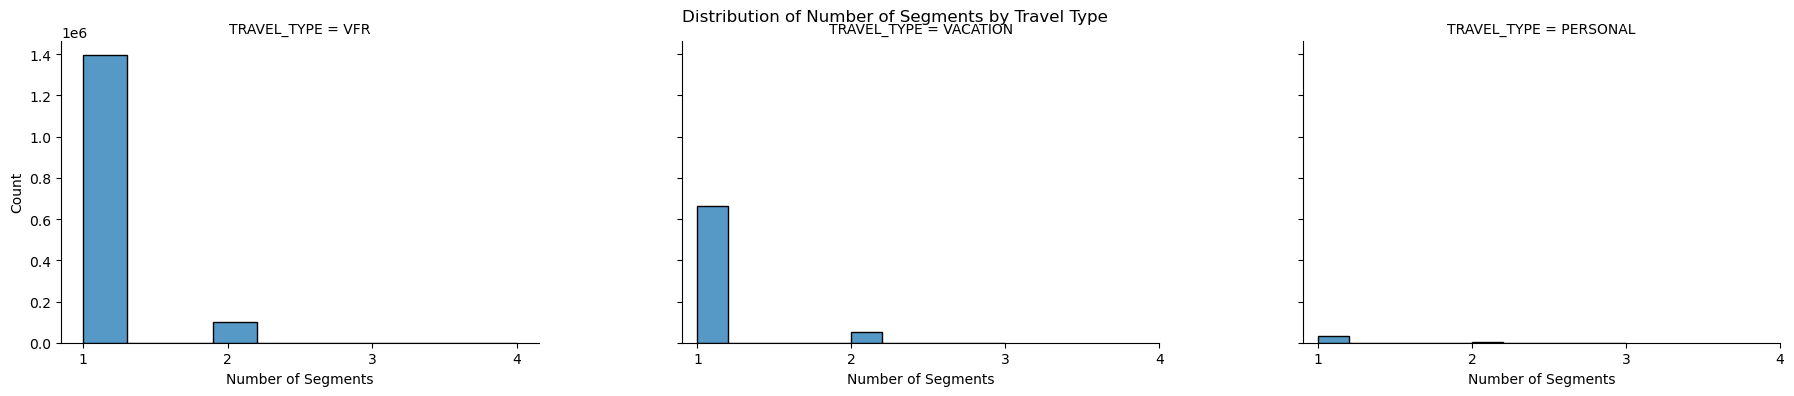

In [43]:
# Create the FacetGrid for each travel type, with histograms of number of segments, and don't share X-axis
g = sns.FacetGrid(leisure_df, col="TRAVEL_TYPE", col_wrap=3, height=4, aspect=1.5, sharex=False)
g.map(sns.histplot, "NUM_SEGMENTS", bins=10, kde=False)
g.set_axis_labels("Number of Segments", "Count")

# Manually adjust the space between the plots to ensure X-axis labels are shown
g.fig.subplots_adjust(hspace=0.8, wspace=0.3)  # Increase space between plots

# Set consistent X-axis ticks for all plots
for ax in g.axes.flat:
    ax.set_xticks([1, 2, 3, 4])  # Set X-axis ticks manually for each subplot

# Force X-axis labels to be displayed
for ax in g.axes.flat:
    ax.set_xlabel("Number of Segments")  # Explicitly set the X-axis label

# Plotting
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Distribution of Number of Segments by Travel Type')
plt.show()

#### <span style="font-family: 'Montserrat', sans-serif;"> Advance Purchase by travel type

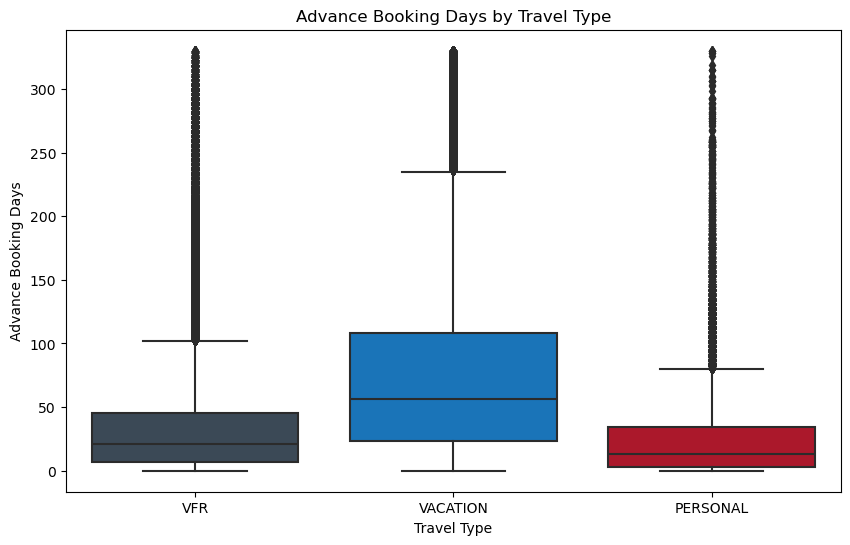

In [44]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='TRAVEL_TYPE', y='ADVANCED_PURCHASE', data=leisure_df, palette=custom_palette)
plt.title('Advance Booking Days by Travel Type')
plt.xlabel('Travel Type')
plt.ylabel('Advance Booking Days')
plt.show()

#### <span style="font-family: 'Montserrat', sans-serif;"> Revenue contribution by travel type

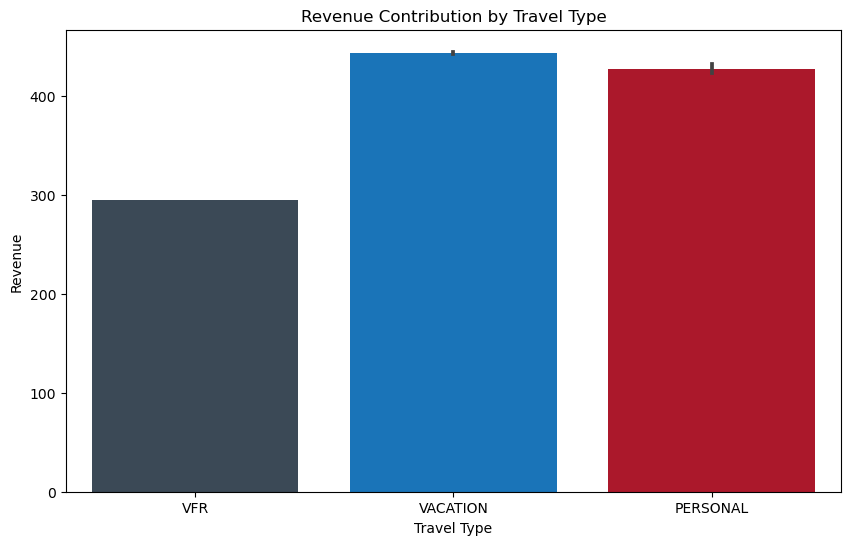

In [45]:
plt.figure(figsize=(10, 6))
sns.barplot(x='TRAVEL_TYPE', y='REVENUE', data=leisure_df, palette=custom_palette)
plt.title('Revenue Contribution by Travel Type')
plt.xlabel('Travel Type')
plt.ylabel('Revenue')
plt.show()

#### <span style="font-family: 'Montserrat', sans-serif;"> Travel Seasonality by Month

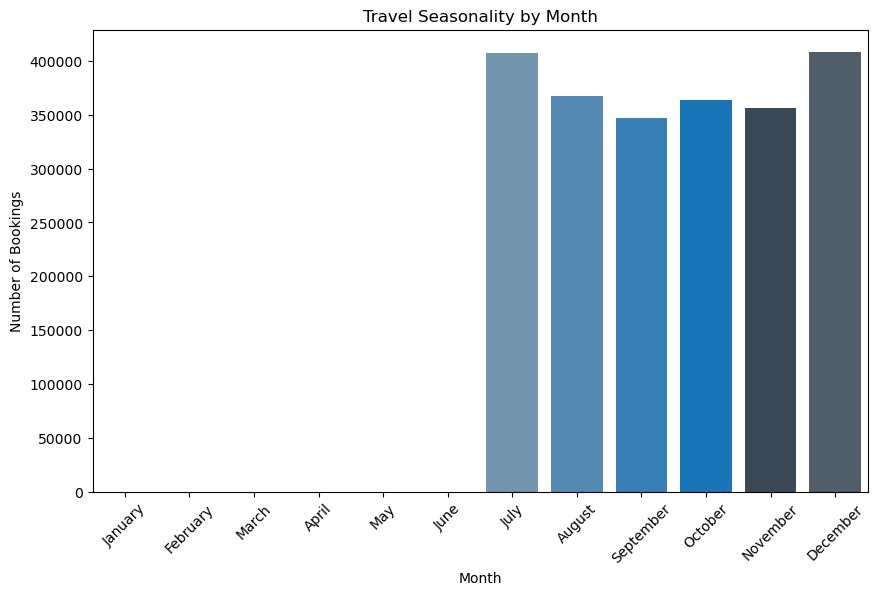

In [46]:
import calendar

# Extract month from departure date for seasonality analysis
leisure_df['departure_month'] = leisure_df['PNR_DEPARTURE_DATE'].dt.month

# Map month numbers to their respective names
leisure_df['departure_month_name'] = leisure_df['departure_month'].apply(lambda x: calendar.month_name[x])

# Plotting
plt.figure(figsize=(10, 6))
sns.countplot(x='departure_month_name', data=leisure_df, palette=extended_palette, order=calendar.month_name[1:])
plt.title('Travel Seasonality by Month')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)  # Rotate month names for better readability
plt.show()

#### <span style="font-family: 'Montserrat', sans-serif;"> Top 10 Origins

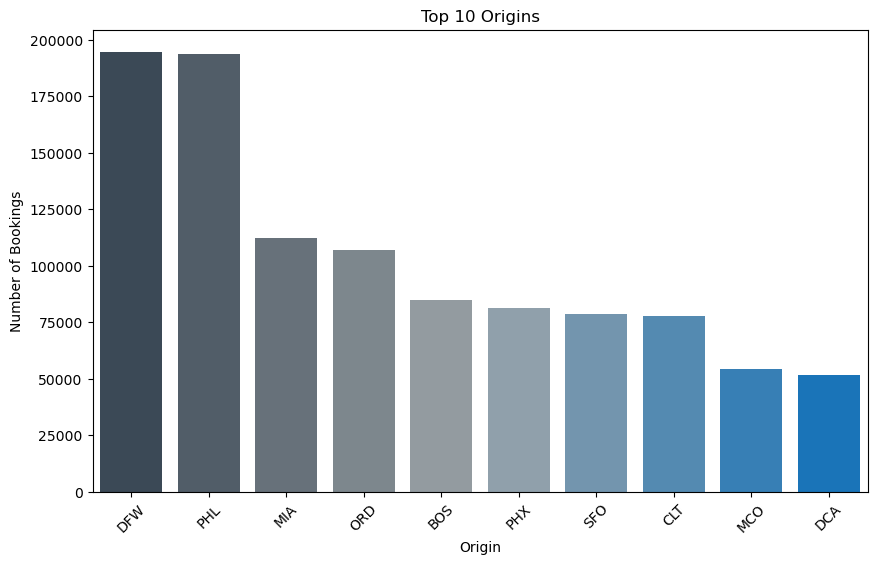

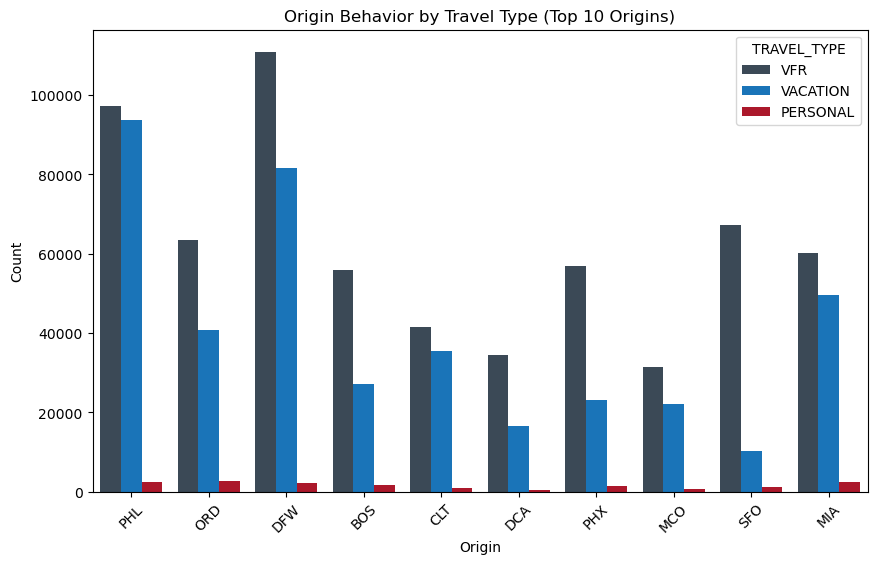

In [47]:

# Count the top origins
top_origins = leisure_df['ORIGIN'].value_counts().head(10)

# Visualize top origins
plt.figure(figsize=(10, 6))
sns.barplot(x=top_origins.index, y=top_origins.values, palette=extended_palette)
plt.title('Top 10 Origins')
plt.xlabel('Origin')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.show()

# Origin behavior by travel type
plt.figure(figsize=(10, 6))
sns.countplot(x='ORIGIN', hue='TRAVEL_TYPE', data=leisure_df[leisure_df['ORIGIN'].isin(top_origins.index)], palette=custom_palette)
plt.title('Origin Behavior by Travel Type (Top 10 Origins)')
plt.xlabel('Origin')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

#### <span style="font-family: 'Montserrat', sans-serif;"> Top 10 Destinations

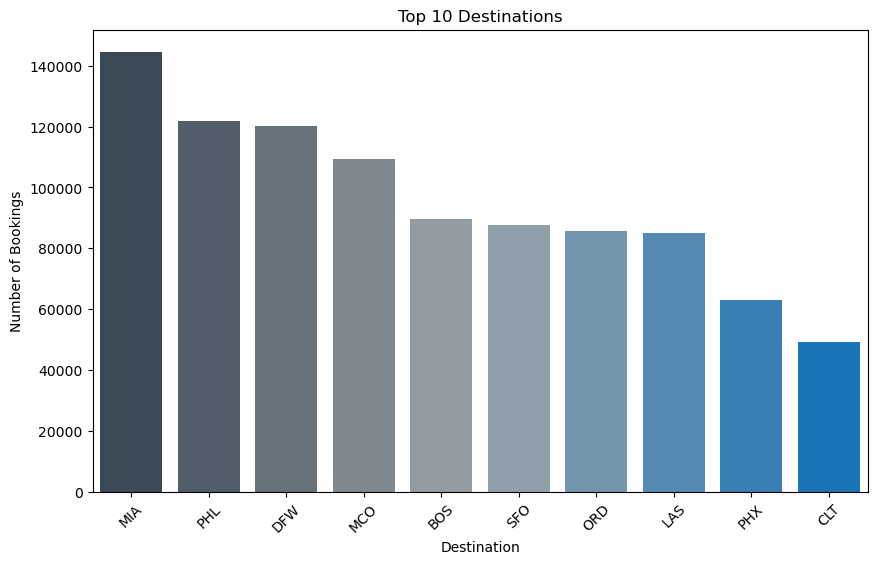

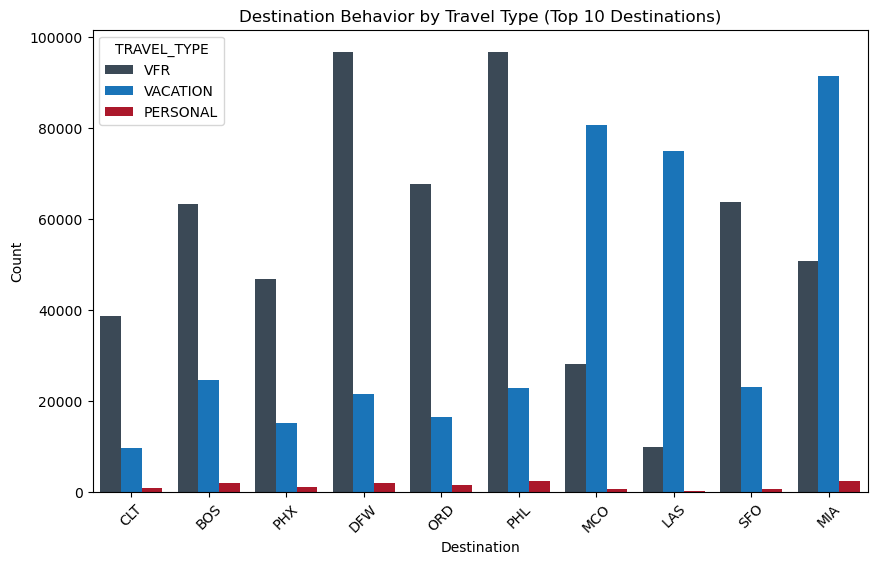

In [48]:
#Destination behavior
#Count the top destinations
top_destinations = leisure_df['DEST'].value_counts().head(10)  # Adjust number for top N destinations

# Visualize top destinations
plt.figure(figsize=(10, 6))
sns.barplot(x=top_destinations.index, y=top_destinations.values, palette=extended_palette)
plt.title('Top 10 Destinations')
plt.xlabel('Destination')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.show()

# Destination behavior by travel type
plt.figure(figsize=(10, 6))
sns.countplot(x='DEST', hue='TRAVEL_TYPE', data=leisure_df[leisure_df['DEST'].isin(top_destinations.index)], palette=custom_palette)
plt.title('Destination Behavior by Travel Type (Top 10 Destinations)')
plt.xlabel('Destination')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

#### <span style="font-family: 'Montserrat', sans-serif;"> Top 10 Routes (Origin-Destination Pairs)

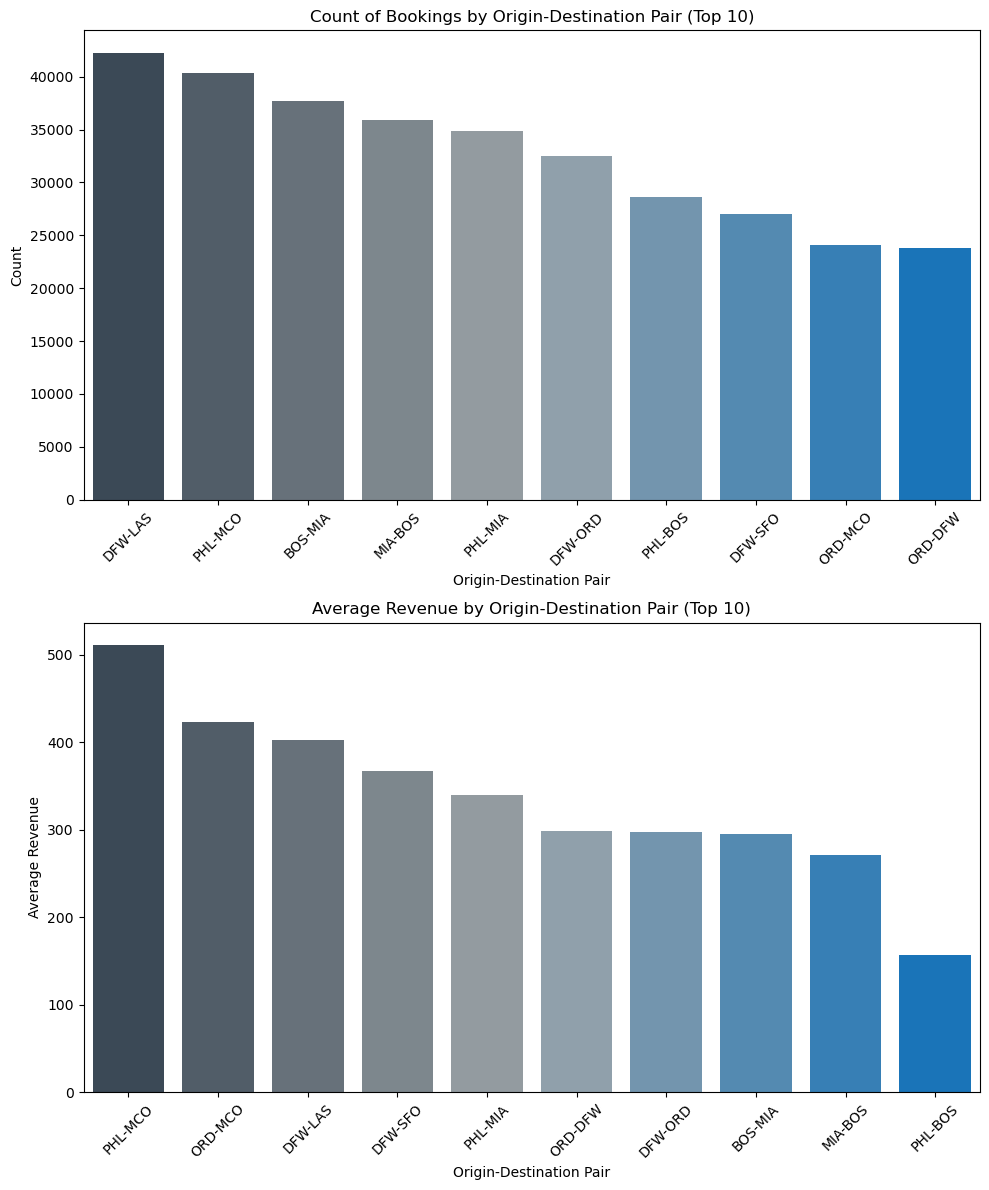

In [49]:
# Get top 15 OD counts
top_OD_counts = leisure_df['OD'].value_counts().head(10).index
top_OD_data = leisure_df[leisure_df['OD'].isin(top_OD_counts)]

# Calculate average revenue per OD pair
od_avg_revenue = top_OD_data.groupby('OD')['REVENUE'].mean().sort_values(ascending=False).head(10)

# Calculate total revenue per OD pair
od_revenue = top_OD_data.groupby('OD')['REVENUE'].sum().sort_values(ascending=False).head(10)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

# Plot 1: Count of Bookings by Origin-Destination Pair
sns.countplot(x='OD', data=top_OD_data, palette=extended_palette, order=top_OD_counts, ax=ax1)
ax1.set_title('Count of Bookings by Origin-Destination Pair (Top 10)')
ax1.set_xlabel('Origin-Destination Pair')
ax1.set_ylabel('Count')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)

# Plot 2: Average Revenue by Origin-Destination Pair
sns.barplot(x=od_avg_revenue.index, y=od_avg_revenue.values, palette=extended_palette, ax=ax2)
ax2.set_title('Average Revenue by Origin-Destination Pair (Top 10)')
ax2.set_xlabel('Origin-Destination Pair')
ax2.set_ylabel('Average Revenue')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

#### <span style="font-family: 'Montserrat', sans-serif;"> Count of Bookings and Revenue generated for each Channel

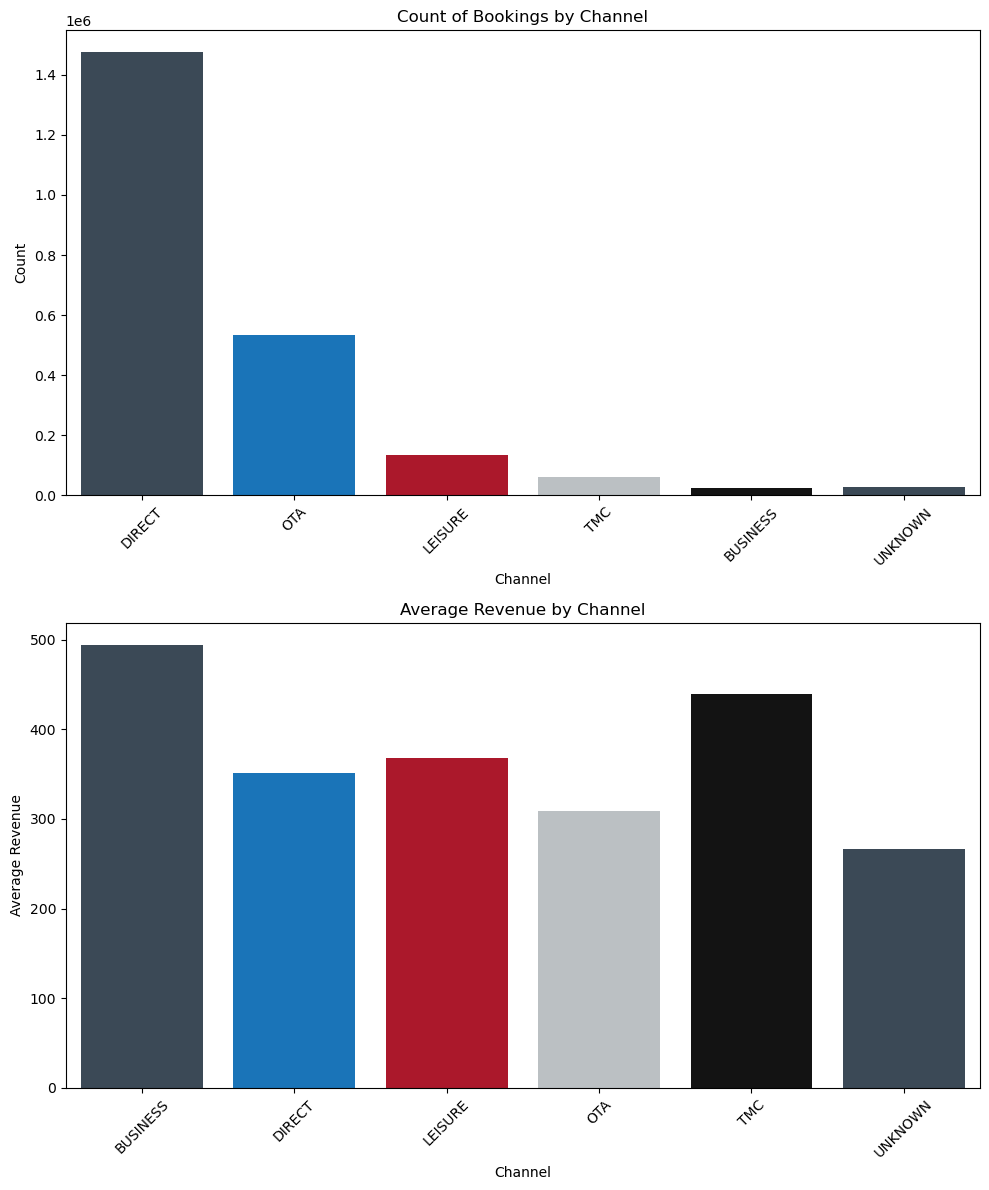

In [50]:
# Create a figure with two plots for Count of Bookings by Channel & Average Revenue by Channel
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

# Plot 1: Count of Bookings by Channel
sns.countplot(x='CHANNEL', data=leisure_df, palette=custom_palette, ax=ax1)
ax1.set_title('Count of Bookings by Channel')
ax1.set_xlabel('Channel')
ax1.set_ylabel('Count')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)

# Plot 2: Average Revenue by Channel
avg_revenue_by_channel = leisure_df.groupby('CHANNEL')['REVENUE'].mean().reset_index()

sns.barplot(x='CHANNEL', y='REVENUE', data=avg_revenue_by_channel, palette=custom_palette, ax=ax2)
ax2.set_title('Average Revenue by Channel')
ax2.set_xlabel('Channel')
ax2.set_ylabel('Average Revenue')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

#### <span style="font-family: 'Montserrat', sans-serif;"> Revenue distribution based on Travel Type

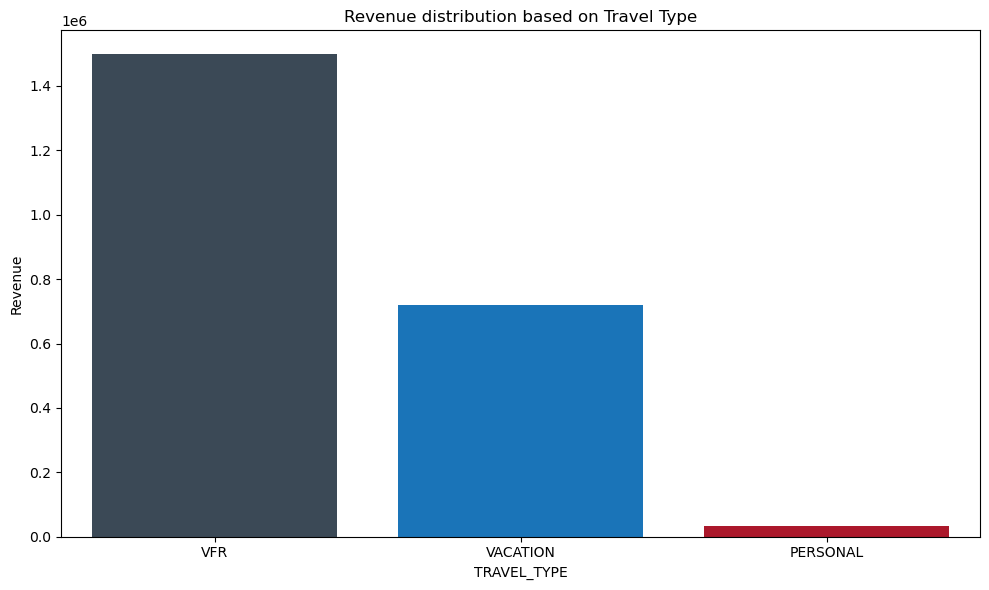

In [51]:
plt.figure(figsize=(10, 6))
sns.countplot(x='TRAVEL_TYPE', data=leisure_df, palette=custom_palette)
plt.title('Revenue distribution based on Travel Type')
plt.xlabel('TRAVEL_TYPE')
plt.ylabel('Revenue')
plt.tight_layout()
plt.show()

#### <span style="font-family: 'Montserrat', sans-serif;"> Booking Date Trends

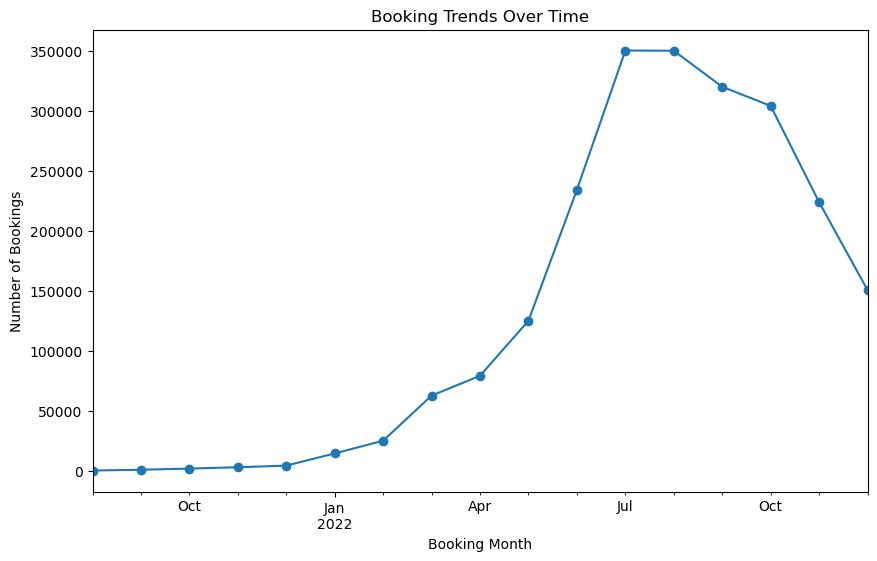

In [52]:
leisure_df['PNR_CREATE_DT'] = pd.to_datetime(leisure_df['PNR_CREATE_DT'])
booking_trends = leisure_df.groupby(leisure_df['PNR_CREATE_DT'].dt.to_period("M")).size()
booking_trends.plot(kind='line', marker='o', figsize=(10,6))
plt.title('Booking Trends Over Time')
plt.xlabel('Booking Month')
plt.ylabel('Number of Bookings')
plt.show()

#### <span style="font-family: 'Montserrat', sans-serif;">Booking Count by number of layovers

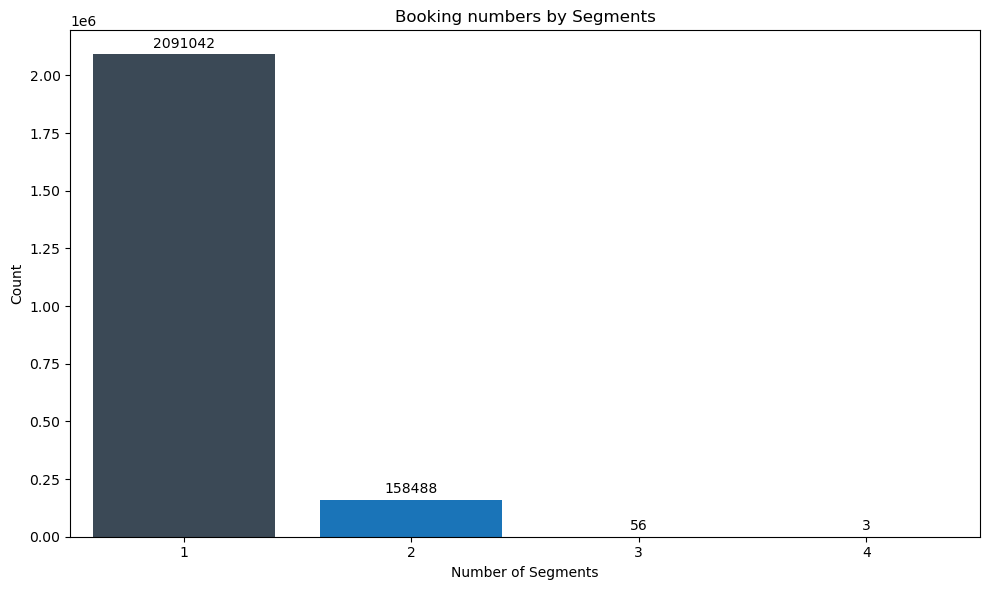

In [53]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='NUM_SEGMENTS', data=leisure_df, palette=custom_palette)

# Add rounded count labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'baseline', fontsize=10, color='black', xytext=(0, 5),
                textcoords = 'offset points')

plt.title('Booking numbers by Segments')
plt.xlabel('Number of Segments')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

#### <span style="font-family: 'Montserrat', sans-serif;"> Revenue per Person vs. Number in Party

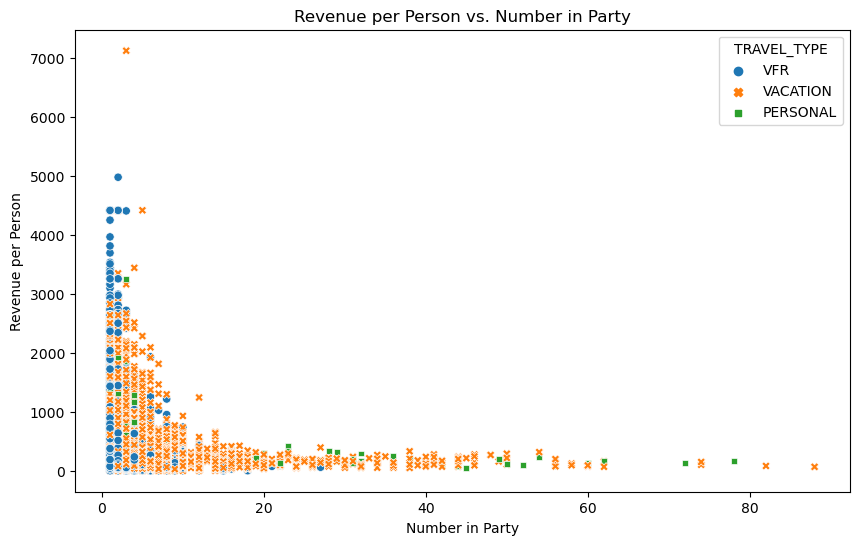

In [54]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=leisure_df, x="NUM_IN_PARTY", y="REVENUE_PER_PERSON", hue="TRAVEL_TYPE", style="TRAVEL_TYPE")
plt.title('Revenue per Person vs. Number in Party')
plt.xlabel('Number in Party')
plt.ylabel('Revenue per Person')
plt.show()

#### <span style="font-family: 'Montserrat', sans-serif;"> Distribution of Advanced Purchase

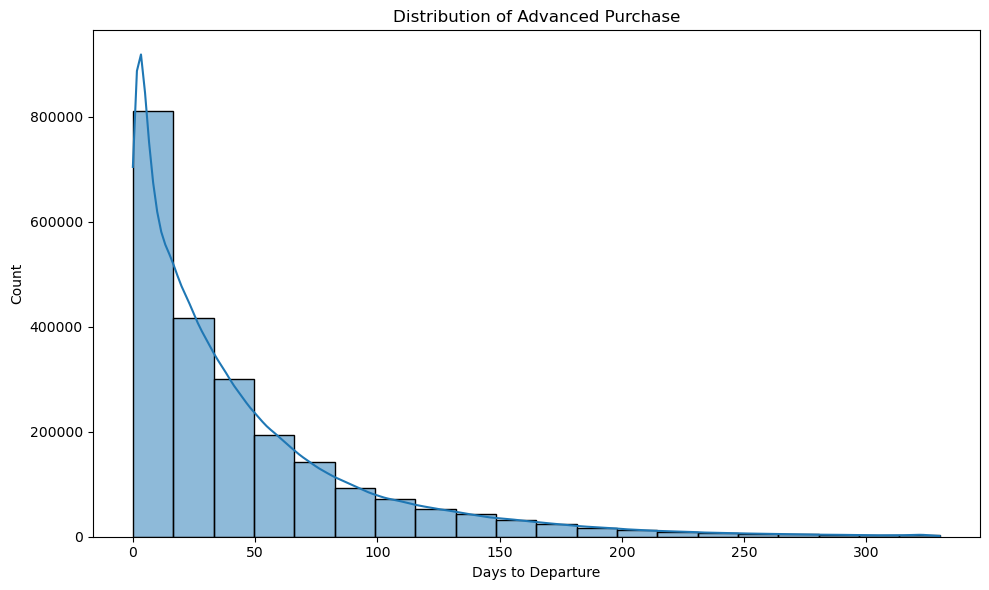

In [55]:
# Histogram (Distribution of Days to Departure)
plt.figure(figsize=(10, 6))
sns.histplot(leisure_df['ADVANCED_PURCHASE'], bins=20, kde=True)
plt.title('Distribution of Advanced Purchase')
plt.xlabel('Days to Departure')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

#### <span style="font-family: 'Montserrat', sans-serif;"> Revenue Distribution of Days to Departure

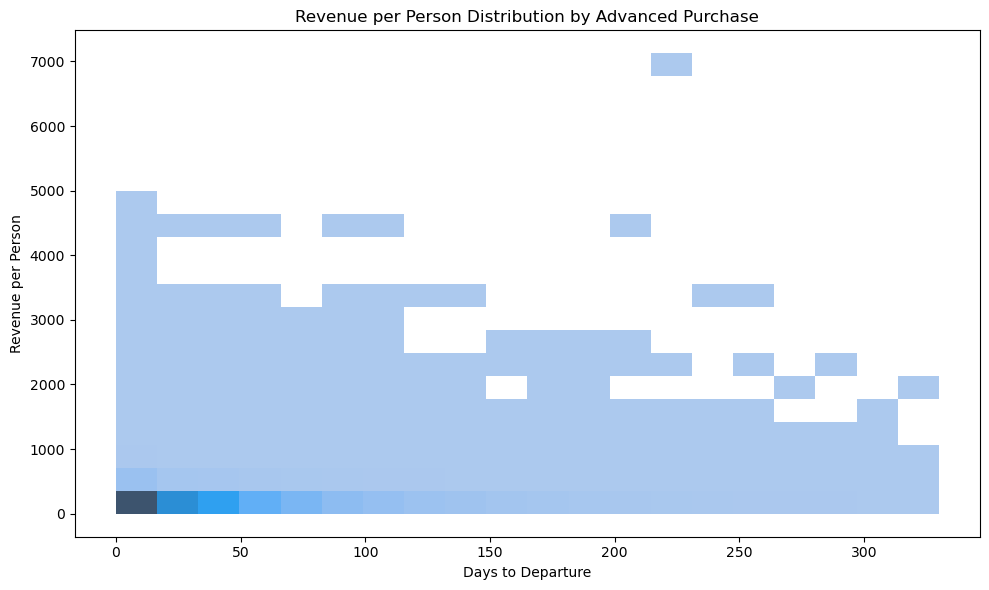

In [56]:
plt.figure(figsize=(10, 6))
sns.histplot(x='ADVANCED_PURCHASE', y='REVENUE_PER_PERSON', data=leisure_df, bins=20, kde=True)
plt.title('Revenue per Person Distribution by Advanced Purchase')
plt.xlabel('Days to Departure')
plt.ylabel('Revenue per Person')
plt.tight_layout()
plt.show()

#### <span style="font-family: 'Montserrat', sans-serif;"> One way vs Round Trip

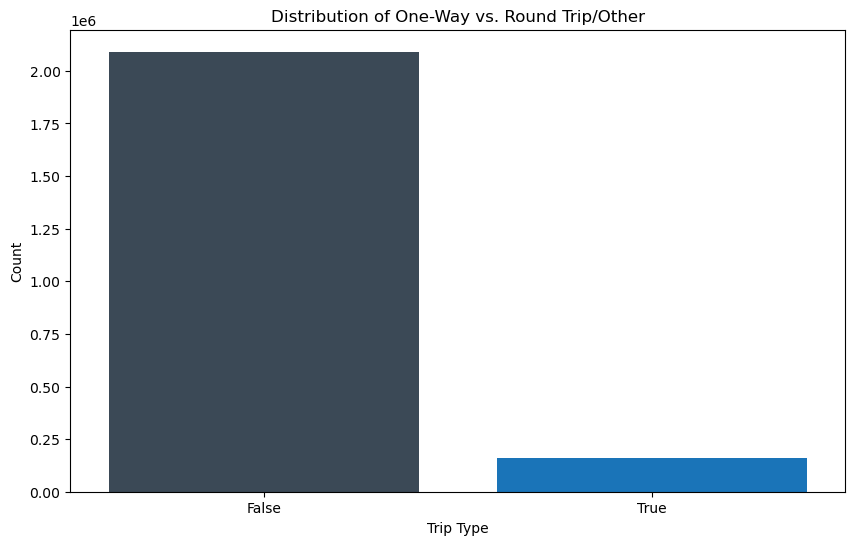

In [57]:
# Visualize the distribution of trip types
plt.figure(figsize=(10, 6))
sns.countplot(x='ROUNDTRIP', data=leisure_df, palette=custom_palette)
plt.title('Distribution of One-Way vs. Round Trip/Other')
plt.xlabel('Trip Type')
plt.ylabel('Count')
plt.show()


## <span style="font-family: 'Montserrat', sans-serif;">  Feature Construction

<span style="font-family: 'Montserrat', sans-serif;"> 1. Determining length of stay based on <b>PNR_DEPARTURE_DATE</b> and <b>PNR_RETURN_DATE</b>

In [59]:
leisure_df['LENGTH_OF_STAY'] = leisure_df['PNR_RETURN_DATE'] - leisure_df['PNR_DEPARTURE_DATE']

<span style="font-family: 'Montserrat', sans-serif;">  2. Determining weekend departure and arrival based on <b>PNR_DEPARTURE_DATE</b> and <b>PNR_RETURN_DATE</b>

<li style="font-family: 'Montserrat', sans-serif;"> Weekend: Friday, Saturday, Sunday

In [60]:
leisure_df['WEEKEND_DEPARTURE'] = leisure_df['PNR_DEPARTURE_DATE'].dt.dayofweek >= 4
leisure_df['WEEKEND_ARRIVAL'] = np.nan
leisure_df['WEEKEND_ARRIVAL'] = np.where((leisure_df['PNR_RETURN_DATE'].notna()) & 
                                         (leisure_df['PNR_RETURN_DATE'].dt.dayofweek >= 4), 1, np.nan)
leisure_df['WEEKEND_ARRIVAL'] = np.where((leisure_df['PNR_RETURN_DATE'].notna()) & 
                                         (leisure_df['PNR_RETURN_DATE'].dt.dayofweek < 4), 0, 
                                         leisure_df['WEEKEND_ARRIVAL'])

#### <span style="font-family: 'Montserrat', sans-serif;"> Weekday vs Weekend Revenue

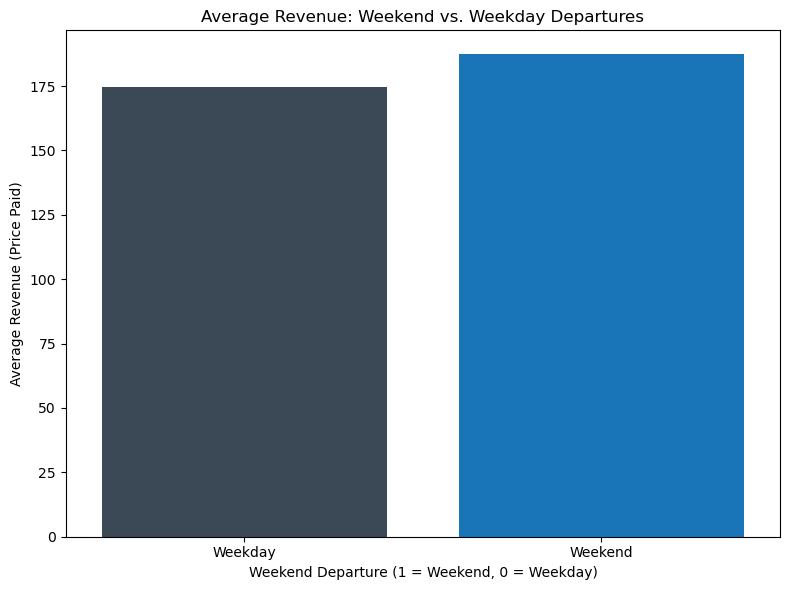

In [61]:
avg_revenue_by_weekend = leisure_df.groupby('WEEKEND_DEPARTURE')['REVENUE_PER_PERSON'].mean().reset_index()

# Create a bar plot to compare weekend vs. weekday revenue
plt.figure(figsize=(8, 6))
sns.barplot(x='WEEKEND_DEPARTURE', y='REVENUE_PER_PERSON', data=avg_revenue_by_weekend, palette=custom_palette)

# Set the plot title and labels
plt.title('Average Revenue: Weekend vs. Weekday Departures')
plt.xlabel('Weekend Departure (1 = Weekend, 0 = Weekday)')
plt.ylabel('Average Revenue (Price Paid)')
plt.xticks([0, 1], ['Weekday', 'Weekend'])
plt.tight_layout()
plt.show()


<span style="font-family: 'Montserrat', sans-serif;">3. Determining travel distance based on the distance between origin and destination

(Data extracted from https://www.transtats.bts.gov/Distance.aspx)

In [63]:
file_path = ''
file_name = 'Distance_of_All_Airports.csv'
airport_distances = pd.read_csv(file_path + file_name)

In [64]:
airport_distances.head()

,ORIGIN,ORIGIN_AIRPORT_SEQ_ID,DEST,DEST_AIRPORT_SEQ_ID,DISTANCE IN MILES
0,01A,1000101,A43,1005601,30.0
1,06A,1000601,A30,1004301,16.0
2,06A,1000601,A43,1005601,18.0
3,06A,1000601,ADQ,1017004,14.0
4,06A,1000601,AOS,1032401,40.0


In [65]:
leisure_df = pd.merge(leisure_df, 
                      airport_distances[['ORIGIN','DEST','DISTANCE IN MILES']], 
                      on = ['ORIGIN', 'DEST'], 
                      how='left')

In [66]:
leisure_df.rename(columns = {'DISTANCE IN MILES': 'TRAVEL_DISTANCE'},
                  inplace = True)

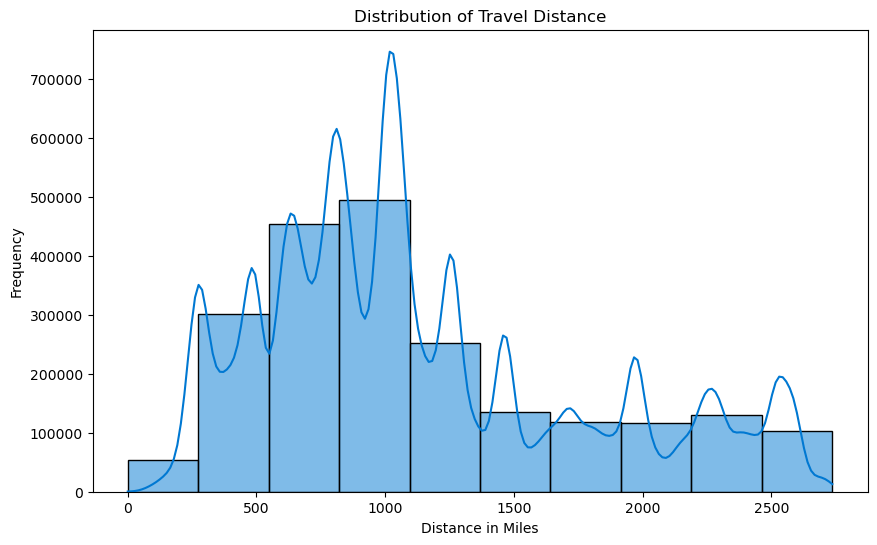

In [67]:
plt.figure(figsize=(10, 6))

# Create a histogram using seaborn's histplot
sns.histplot(leisure_df['TRAVEL_DISTANCE'], bins=10, kde=True, color='#0078D2')

# Add labels and title
plt.xlabel('Distance in Miles')
plt.ylabel('Frequency')
plt.title('Distribution of Travel Distance')

# Show the plot
plt.show()

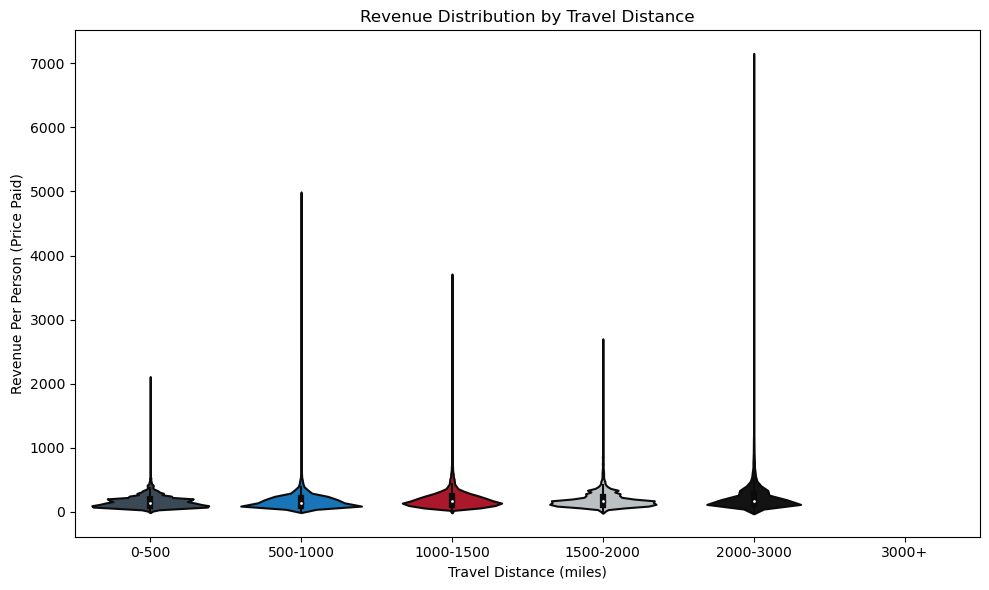

In [68]:
distance_bins = [0, 500, 1000, 1500, 2000, 3000, 5000]
distance_labels = ['0-500', '500-1000', '1000-1500', '1500-2000', '2000-3000', '3000+']
leisure_df['Distance_Bin'] = pd.cut(leisure_df['TRAVEL_DISTANCE'], bins=distance_bins, labels=distance_labels)
plt.figure(figsize=(10, 6))
sns.violinplot(x='Distance_Bin', y='REVENUE_PER_PERSON', data=leisure_df, palette=custom_palette)

plt.title('Revenue Distribution by Travel Distance')
plt.xlabel('Travel Distance (miles)')
plt.ylabel('Revenue Per Person (Price Paid)')
plt.tight_layout()
plt.show()



<span style="font-family: 'Montserrat', sans-serif;"> 4. Holiday Travel

Create features that can determine trips taken during or around public holidays. Using Holidays API:https://python-holidays.readthedocs.io/en/latest/

In [69]:
pip install --upgrade holidays

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 24.3 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: /Users/Wen/anaconda3/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [70]:
from datetime import date
import holidays
us_holidays = holidays.country_holidays(country='US', years=[2022,2023])  # this is a dict-like object
nyse_holidays = holidays.NYSE()  # this is a dict-like object
us_holidays

{datetime.date(2022, 1, 1): "New Year's Day", datetime.date(2022, 5, 30): 'Memorial Day', datetime.date(2022, 6, 19): 'Juneteenth National Independence Day', datetime.date(2022, 6, 20): 'Juneteenth National Independence Day (observed)', datetime.date(2022, 7, 4): 'Independence Day', datetime.date(2022, 9, 5): 'Labor Day', datetime.date(2022, 11, 11): 'Veterans Day', datetime.date(2022, 11, 24): 'Thanksgiving', datetime.date(2022, 12, 25): 'Christmas Day', datetime.date(2022, 12, 26): 'Christmas Day (observed)', datetime.date(2022, 1, 17): 'Martin Luther King Jr. Day', datetime.date(2022, 2, 21): "Washington's Birthday", datetime.date(2023, 1, 1): "New Year's Day", datetime.date(2023, 1, 2): "New Year's Day (observed)", datetime.date(2023, 5, 29): 'Memorial Day', datetime.date(2023, 6, 19): 'Juneteenth National Independence Day', datetime.date(2023, 7, 4): 'Independence Day', datetime.date(2023, 9, 4): 'Labor Day', datetime.date(2023, 11, 11): 'Veterans Day', datetime.date(2023, 11, 10)

In [71]:
def get_holiday(pnr_date, holiday_dict):
    if pd.isna(pnr_date):  # Check for NaT values
        return None
    pnr_date_converted = pnr_date.date()  # Convert pandas Timestamp to datetime.date
    return holiday_dict.get(pnr_date_converted, None)

<span style="font-family: 'Montserrat', sans-serif;">This is a custom function to classify trips as holiday travel based on a few assumptions, and extrapolating holidays to the nearest weekend to capture more holiday travel effect

In [72]:
from datetime import timedelta

def extend_to_nearest_weekend(holiday_date):
    weekday = holiday_date.weekday()
    if weekday == 0:  # Monday: extend to the preceding weekend (Saturday, Sunday)
            return [holiday_date - timedelta(days=2), holiday_date - timedelta(days=1)]
    elif weekday == 1:  # Tuesday: extend to the preceding weekend (Saturday, Sunday, Monday)
        return [holiday_date - timedelta(days=3), holiday_date - timedelta(days=2), holiday_date - timedelta(days=1)]
    elif weekday == 2:  # Wednesday: do not extend
        return [holiday_date]
    elif weekday == 3:  # Thursday: extend to the following weekend (Friday, Saturday, Sunday)
        return [holiday_date + timedelta(days=1),holiday_date + timedelta(days=2), holiday_date + timedelta(days=3)]
    elif weekday == 4:  # Friday: extend to the following weekend (Saturday, Sunday)
        return [holiday_date + timedelta(days=1), holiday_date + timedelta(days=2)]
    elif weekday == 5: # Saturday: extend both sides weekend (Friday, Saturday, Sunday)
        return [holiday_date - timedelta(days=1), holiday_date + timedelta(days=1)]
    else:  #Sunday: extend to preceding weekend (Friday, Saturday, Sunday)
        return [holiday_date - timedelta(days=2), holiday_date - timedelta(days=1)]
extended_holidays = {}

for holiday_date, holiday_name in us_holidays.items():
    # Get the holiday date itself
    extended_holidays[holiday_date] = holiday_name
    
    # Extend the holiday to the nearest weekend and update the list
    nearest_weekend = extend_to_nearest_weekend(holiday_date)
    for date in nearest_weekend:
        extended_holidays[date] = holiday_name

In [73]:
# Apply to PNR_DEPARTURE_DATE and PNR_RETURN_DATE for U.S. holidays
leisure_df['Holiday_Departure'] = leisure_df['PNR_DEPARTURE_DATE'].apply(lambda x: get_holiday(x, extended_holidays))
leisure_df['Holiday_Return'] = leisure_df['PNR_RETURN_DATE'].apply(lambda x: get_holiday(x, extended_holidays))

In [74]:
leisure_df.Holiday_Departure.value_counts()

Holiday_Departure
Christmas Day (observed)     42919
Independence Day             40485
Thanksgiving                 39179
Veterans Day                 36864
Labor Day                    32420
Christmas Day                19276
New Year's Day               16711
New Year's Day (observed)     9950
Name: count, dtype: int64

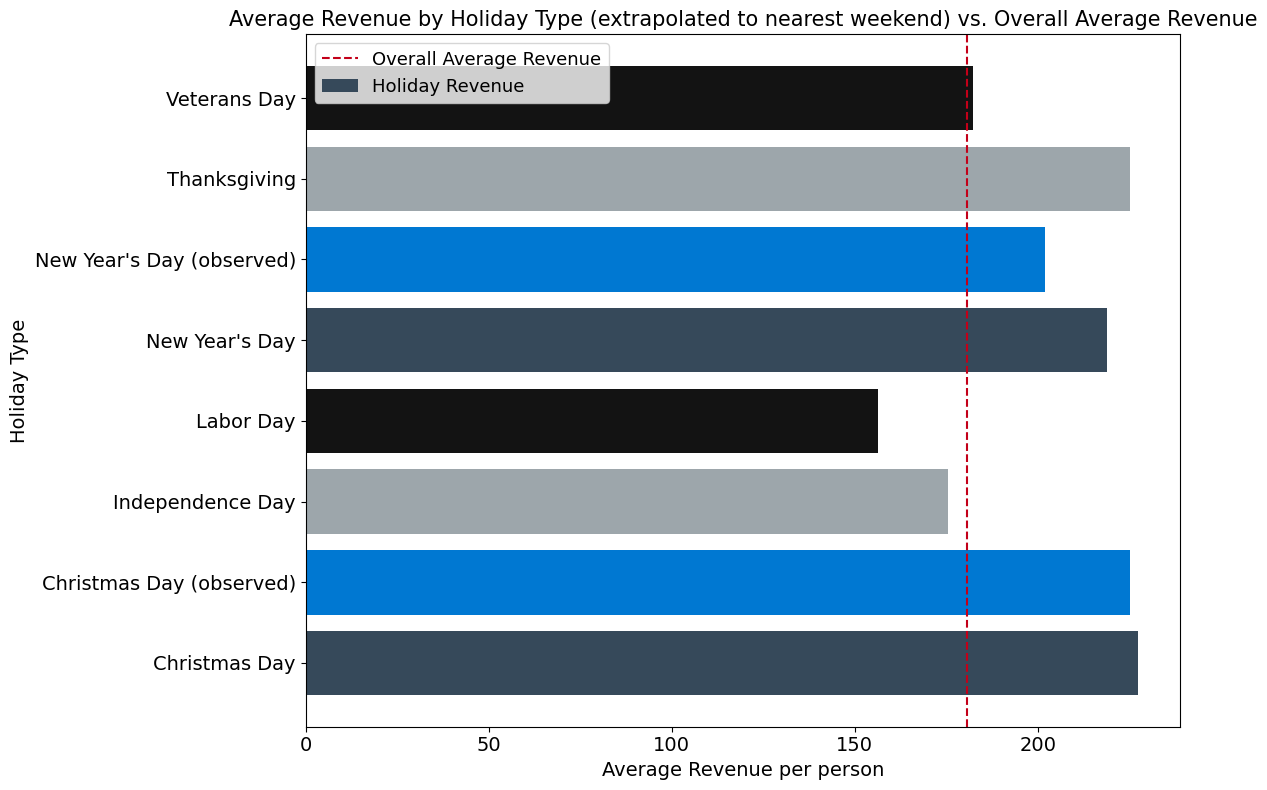

In [75]:
# Grouping by holiday type and calculating the average revenue for each holiday
holiday_revenue_by_type = leisure_df.groupby('Holiday_Departure')['REVENUE_PER_PERSON'].mean().reset_index()

# Adding a column for the overall average revenue
holiday_revenue_by_type['Average_Revenue'] = leisure_df['REVENUE_PER_PERSON'].mean()

# Now, we'll visualize both the average revenue by holiday and the overall average revenue
plt.figure(figsize=(12, 8))

# Plotting the holiday-specific revenue
plt.barh(holiday_revenue_by_type['Holiday_Departure'], 
         holiday_revenue_by_type['REVENUE_PER_PERSON'], 
         color=['#36495A','#0078D2','#9DA6AB','#131313'], 
         label='Holiday Revenue')

# Plotting the overall average revenue as a vertical line
plt.axvline(leisure_df['REVENUE_PER_PERSON'].mean(), color='#C30019', linestyle='--', label='Overall Average Revenue')

# Adding labels and title
plt.xlabel('Average Revenue per person', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Holiday Type', fontsize=14)
plt.title('Average Revenue by Holiday Type (extrapolated to nearest weekend) vs. Overall Average Revenue', fontsize=15)
plt.legend(fontsize=13)

# Show plot
plt.tight_layout()
plt.show()

In [76]:
leisure_df['Holiday_Departure'].value_counts()

Holiday_Departure
Christmas Day (observed)     42919
Independence Day             40485
Thanksgiving                 39179
Veterans Day                 36864
Labor Day                    32420
Christmas Day                19276
New Year's Day               16711
New Year's Day (observed)     9950
Name: count, dtype: int64

<span style="font-family: 'Montserrat', sans-serif;"> 5. Cumulative Bookings until PNR Creation

<span style="font-family: 'Montserrat', sans-serif;">This metric tracks the number of bookings for the flight completed prior to the customer's booking

In [77]:
leisure_df = leisure_df.sort_values(by=['OD', 'PNR_DEPARTURE_DATE', 'PNR_CREATE_DT'])

# Step 3: Calculate cumulative booking count for each OD pair and departure date before the current booking is made
leisure_df['Cumulative_Booking_Count'] = leisure_df.groupby(['OD', 'PNR_DEPARTURE_DATE']).cumcount()

#### <span style="font-family: 'Montserrat', sans-serif;">Visualize Cumulative Booking Count for a specific Flight

In [78]:
bos_mia_sept26 = leisure_df[(leisure_df['OD']=='BOS-MIA') & (leisure_df['PNR_DEPARTURE_DATE']=='2022-09-26')]

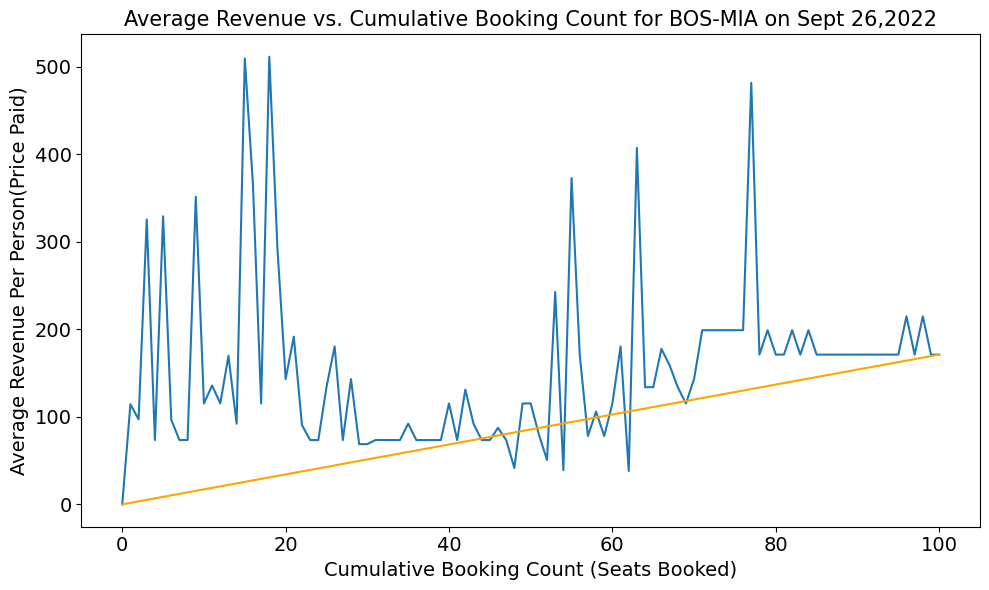

In [79]:
# Calculate average revenue at each cumulative booking stage
avg_revenue_by_cum_booking = bos_mia_sept26.groupby('Cumulative_Booking_Count')['REVENUE_PER_PERSON'].mean().reset_index()

# Create a line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='Cumulative_Booking_Count', y='REVENUE_PER_PERSON', data=avg_revenue_by_cum_booking)

plt.plot(
    [avg_revenue_by_cum_booking['Cumulative_Booking_Count'].iloc[0], avg_revenue_by_cum_booking['Cumulative_Booking_Count'].iloc[-1]],
    [avg_revenue_by_cum_booking['REVENUE_PER_PERSON'].iloc[0], avg_revenue_by_cum_booking['REVENUE_PER_PERSON'].iloc[-1]],
    color='orange', label='Trend Line'
)
plt.title('Average Revenue vs. Cumulative Booking Count for BOS-MIA on Sept 26,2022', fontsize=15)
plt.xlabel('Cumulative Booking Count (Seats Booked)', fontsize=14)
plt.ylabel('Average Revenue Per Person(Price Paid)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()

<span style="font-family: 'Montserrat', sans-serif;"> 6. Booking Window 

<span style="font-family: 'Montserrat', sans-serif;">This metric segregates the advanced purchase days into bins of 7, as used by the aviation industry

In [80]:
bins = [0, 7, 14, 21, float('inf')]
labels = ['1-7 days', '8-14 days', '15-21 days', '21+ days']

# Create the BOOKING_WINDOW column based on the ADVANCED_PURCHASE column
leisure_df['BOOKING_WINDOW'] = pd.cut(leisure_df['ADVANCED_PURCHASE'], bins=bins, labels=labels)

# Display the first few rows to confirm the changes
print(leisure_df[['ADVANCED_PURCHASE', 'BOOKING_WINDOW']].head())

        ADVANCED_PURCHASE BOOKING_WINDOW
80521                   3       1-7 days
84806                   3       1-7 days
280773                  2       1-7 days
16303                   1       1-7 days
251373                  2       1-7 days


#### <span style="font-family: 'Montserrat', sans-serif;">Revenue Distribution by BOOKING_WINDOW

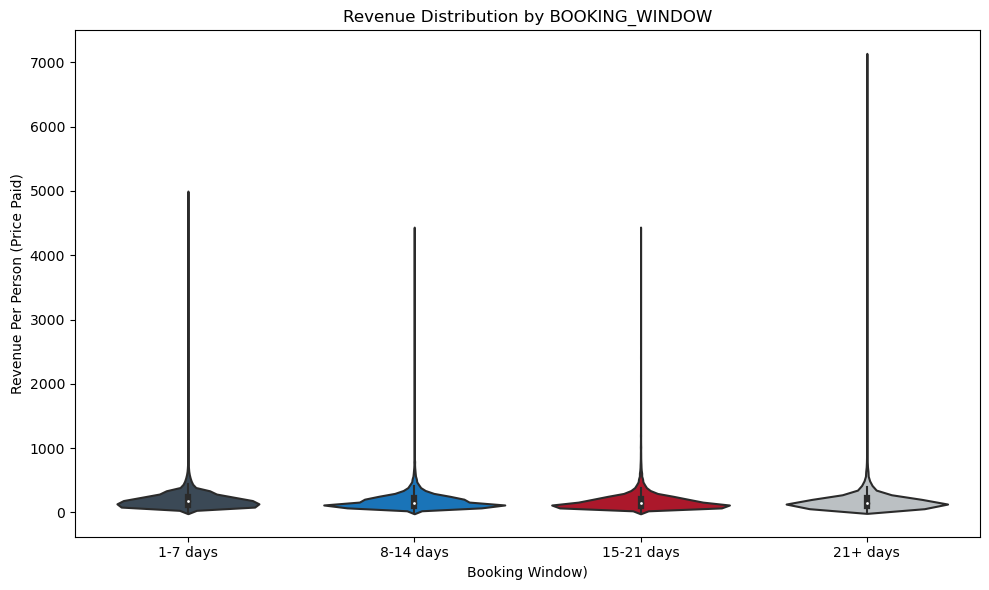

In [81]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='BOOKING_WINDOW', y='REVENUE_PER_PERSON', data=leisure_df, palette=custom_palette)

plt.title('Revenue Distribution by BOOKING_WINDOW')
plt.xlabel('Booking Window)')
plt.ylabel('Revenue Per Person (Price Paid)')
plt.tight_layout()
plt.show()

#### <li style="font-family: 'Montserrat', sans-serif;">Storing the processed data into a csv file. This file will be used further for evaluating variable importance and modeling

In [82]:
leisure_df.to_csv('bookingsData.csv')

In [83]:
#leisure_df.sample(100, random_state=123).to_csv('Sample100_Data.csv', index=False)